In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df2 = pd.read_csv('loan_prediction.csv')

In [4]:
df = pd.read_csv('kamyr-digester.csv')

In [5]:
df.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      301 non-null    object 
 1   Y-Kappa          301 non-null    float64
 2   ChipRate         297 non-null    float64
 3   BF-CMratio       287 non-null    float64
 4   BlowFlow         288 non-null    float64
 5   ChipLevel4       300 non-null    float64
 6   T-upperExt-2     300 non-null    float64
 7   T-lowerExt-2     300 non-null    float64
 8   UCZAA            277 non-null    float64
 9   WhiteFlow-4      300 non-null    float64
 10  AAWhiteSt-4      160 non-null    float64
 11  AA-Wood-4        300 non-null    float64
 12  ChipMoisture-4   300 non-null    float64
 13  SteamFlow-4      300 non-null    float64
 14  Lower-HeatT-3    300 non-null    float64
 15  Upper-HeatT-3    300 non-null    float64
 16  ChipMass-4       300 non-null    float64
 17  WeakLiquorF     

In [7]:
## first step is to check whether they are missing at random or not
## next step is to find out what percentage of data is missing(if it's less than 5% then we can make changes or simply remove it)

In [8]:
df.isnull().sum()

Observation          0
Y-Kappa              0
ChipRate             4
BF-CMratio          14
BlowFlow            13
ChipLevel4           1
T-upperExt-2         1
T-lowerExt-2         1
UCZAA               24
WhiteFlow-4          1
AAWhiteSt-4        141
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        1
Upper-HeatT-3        1
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          1
WeakWashF            1
SteamHeatF-3         1
T-Top-Chips-4        1
SulphidityL-4      141
dtype: int64

In [9]:
df.isnull().mean()*100

Observation         0.000000
Y-Kappa             0.000000
ChipRate            1.328904
BF-CMratio          4.651163
BlowFlow            4.318937
ChipLevel4          0.332226
T-upperExt-2        0.332226
T-lowerExt-2        0.332226
UCZAA               7.973422
WhiteFlow-4         0.332226
AAWhiteSt-4        46.843854
AA-Wood-4           0.332226
ChipMoisture-4      0.332226
SteamFlow-4         0.332226
Lower-HeatT-3       0.332226
Upper-HeatT-3       0.332226
ChipMass-4          0.332226
WeakLiquorF         0.332226
BlackFlow-2         0.332226
WeakWashF           0.332226
SteamHeatF-3        0.332226
T-Top-Chips-4       0.332226
SulphidityL-4      46.843854
dtype: float64

In [10]:
null_columns = df.isnull().mean()[(df.isnull().mean().values*100 >0) & (df.isnull().mean().values*100 < 5)].keys().to_list()

df.isnull().mean()[(df.isnull().mean().values*100 >0) & (df.isnull().mean().values*100 < 5)].keys()

## these are all the columns in which we are going to change or maybe fill null values

Index(['ChipRate', 'BF-CMratio', 'BlowFlow', 'ChipLevel4 ', 'T-upperExt-2 ',
       'T-lowerExt-2  ', 'WhiteFlow-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ',
       'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ',
       'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ',
       'T-Top-Chips-4 '],
      dtype='object')

#### Now using mean/median to fill all those missing values and then comparing it whether the distribution changes and also checking if the variance is different or it stays the same

In [11]:
# for i in null_columns:
#     print(i, df['i'].mean())
for i in null_columns:
    print(i, df[i].mean())
    
# here finding all the mean values of all those columns which has null values and then will later create a new column where all
# null values will be replaced by these mean and median values

ChipRate 14.33867003367003
BF-CMratio 87.2715644599303
BlowFlow 1235.5372777777777
ChipLevel4  259.36599333333334
T-upperExt-2  356.90703333333335
T-lowerExt-2   324.01078333333334
WhiteFlow-4  593.1480900000001
AA-Wood-4   17.892030000000002
ChipMoisture-4  46.87553
SteamFlow-4  66.83456666666667
Lower-HeatT-3 325.37041
Upper-HeatT-3  300.38174333333336
ChipMass-4  162.12061
WeakLiquorF  875.4915633333335
BlackFlow-2  1170.3871766666668
WeakWashF  266.1046333333333
SteamHeatF-3  49.66453666666666
T-Top-Chips-4  251.22968666666662


In [12]:
df_new = df.copy()

In [13]:
for i in null_columns:
    df_new[i + '_mean'] = df_new[i].fillna(df_new[i].mean())
    df_new[i + '_median'] = df_new[i].fillna(df_new[i].median())

In [14]:
df_new.head()

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,WeakLiquorF _mean,WeakLiquorF _median,BlackFlow-2 _mean,BlackFlow-2 _median,WeakWashF _mean,WeakWashF _median,SteamHeatF-3 _mean,SteamHeatF-3 _median,T-Top-Chips-4 _mean,T-Top-Chips-4 _median
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,1127.197,1127.197,1319.039,1319.039,257.325,257.325,54.612,54.612,252.077,252.077
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,665.975,665.975,1297.317,1297.317,241.182,241.182,46.603,46.603,251.406,251.406
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,677.534,677.534,1327.072,1327.072,237.272,237.272,51.795,51.795,251.335,251.335
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,767.853,767.853,1324.461,1324.461,239.478,239.478,54.846,54.846,250.312,250.312
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,888.448,888.448,1343.424,1343.424,215.372,215.372,54.186,54.186,249.916,249.916


In [15]:
df.columns

Index(['Observation', 'Y-Kappa', 'ChipRate', 'BF-CMratio', 'BlowFlow',
       'ChipLevel4 ', 'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA',
       'WhiteFlow-4 ', 'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ',
       'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ',
       'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ',
       'T-Top-Chips-4 ', 'SulphidityL-4 '],
      dtype='object')

In [16]:
# Now I have to plot 3 columns graph in one graph (original column, mean column, median column)

total_columns = df_new.columns.to_list()

substring = 'ChipRate'

occurrences = [elem for elem in total_columns if substring in elem]

print(occurrences)


['ChipRate', 'ChipRate_mean', 'ChipRate_median']


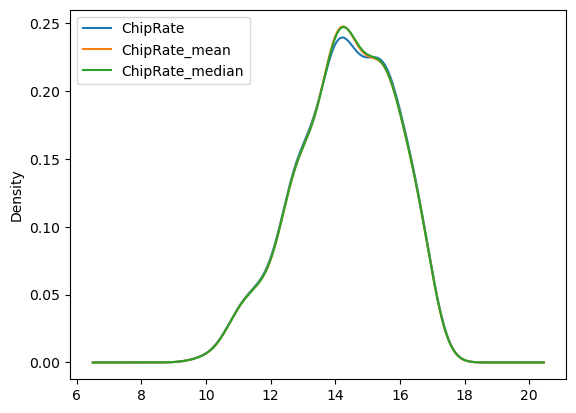

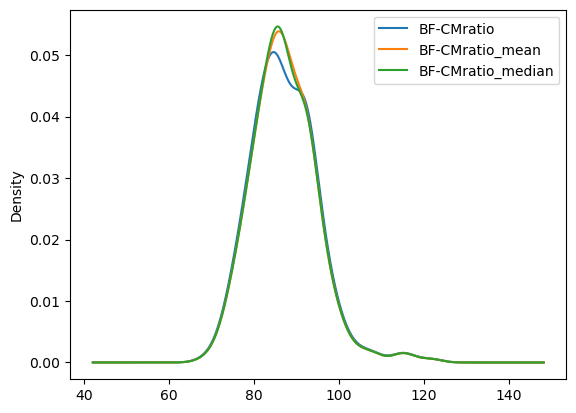

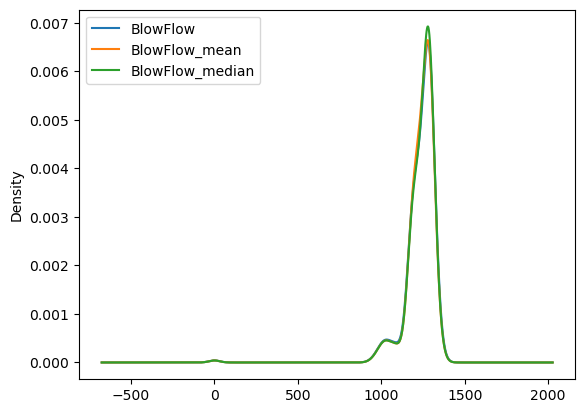

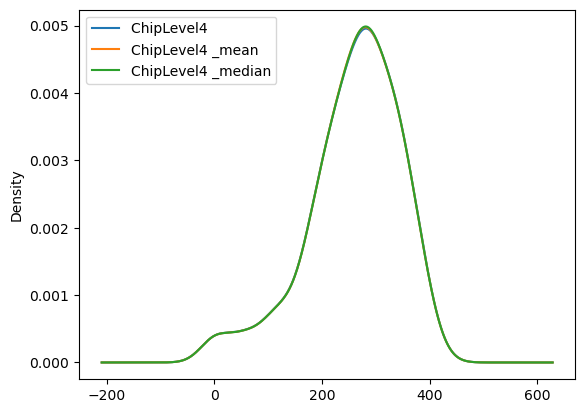

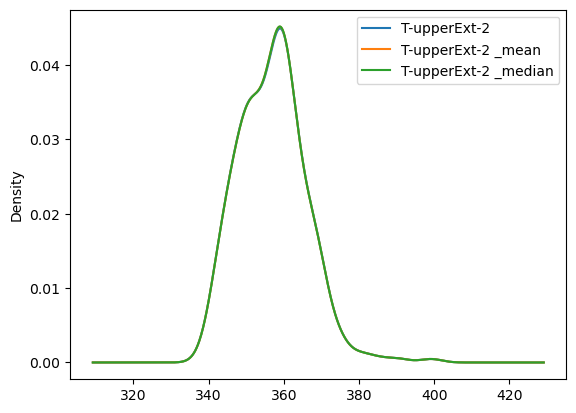

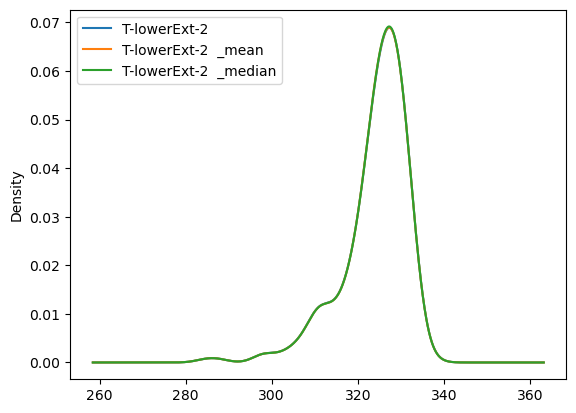

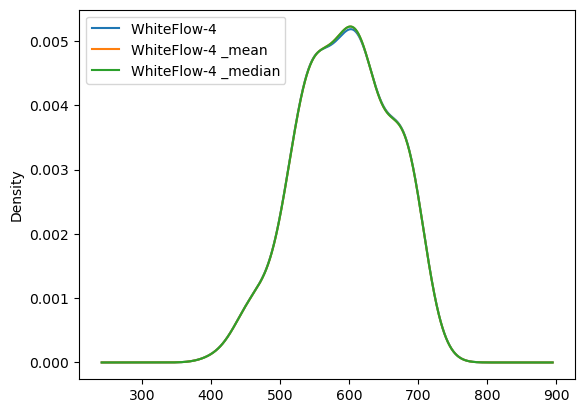

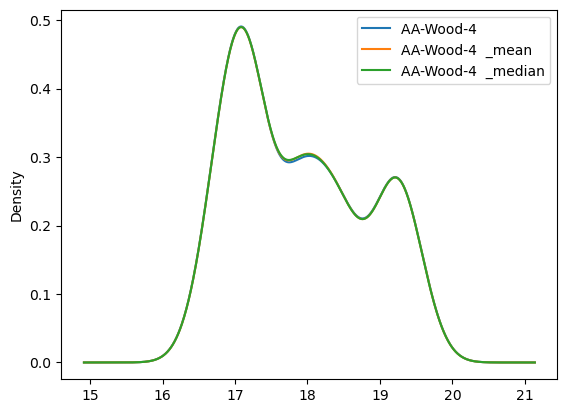

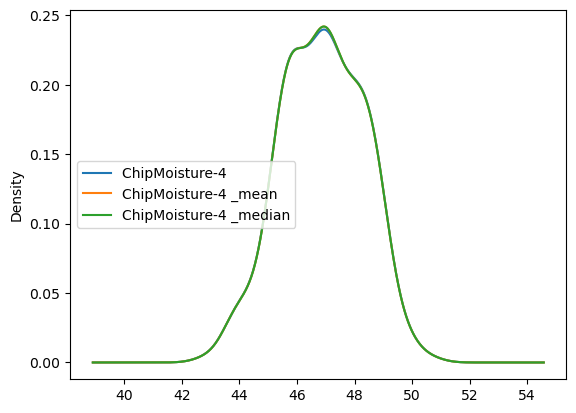

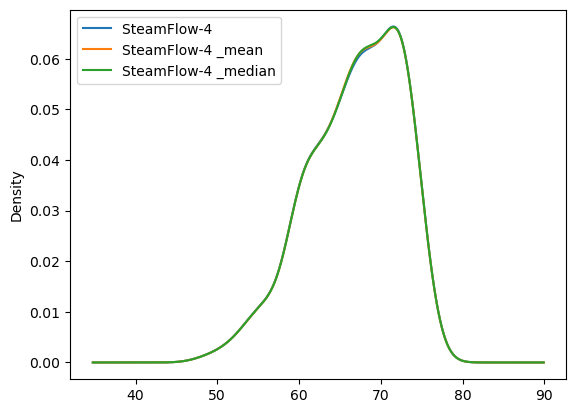

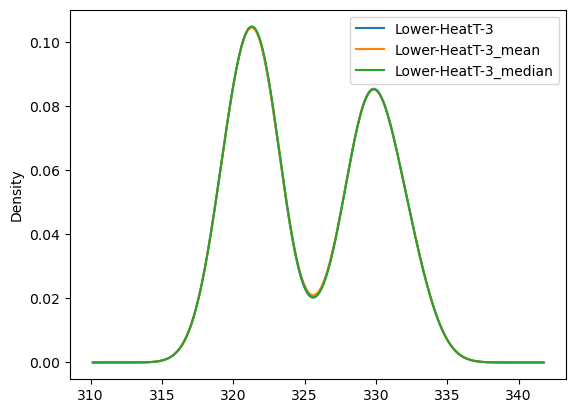

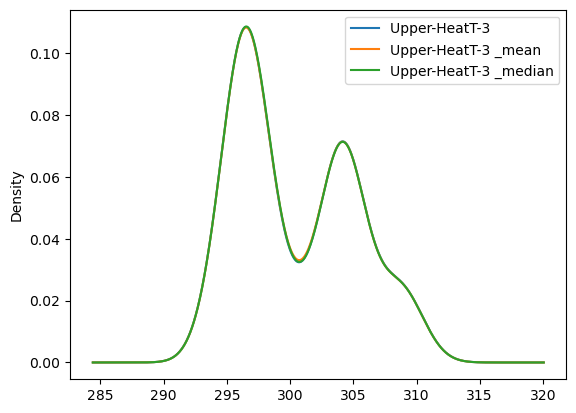

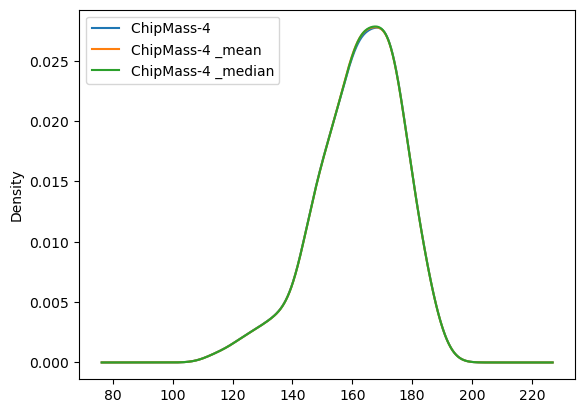

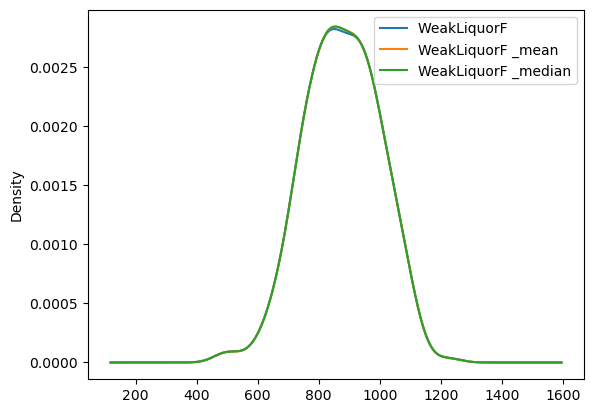

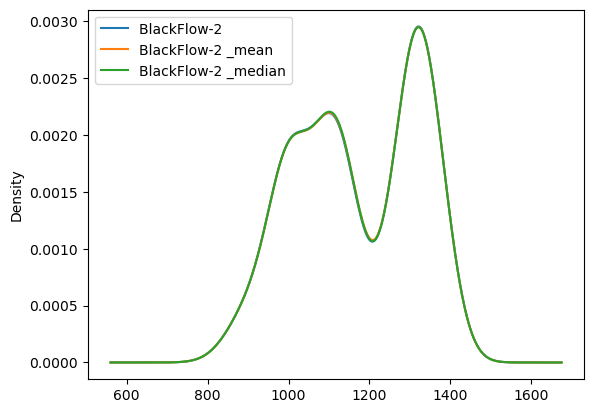

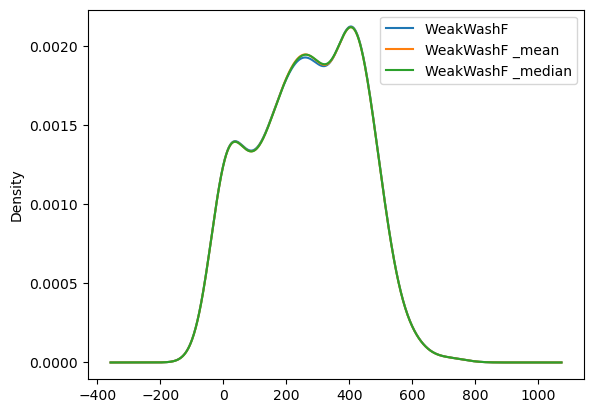

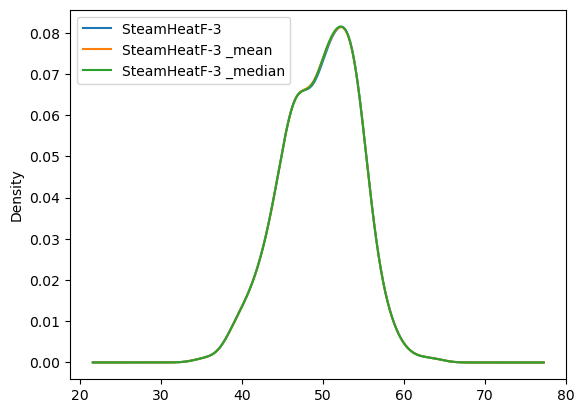

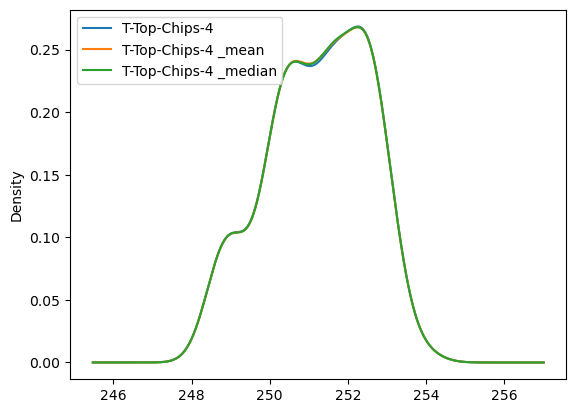

In [17]:
for i in null_columns:
    s = []
    for j in total_columns:
        if i in j:
            s.append(j)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    df_new[s[0]].plot(kind='kde',ax=ax)
    df_new[s[1]].plot(kind='kde',ax=ax)
    df_new[s[2]].plot(kind='kde',ax=ax)
    
    plt.legend();

In [18]:
### Distribution looks almost the same for all columns

#### now checking the covariance and correlation and comparing it if it changes or not

In [19]:
# df_new.drop('Observation',axis=1).sort_index(axis=1).cov()

In [20]:
# by checking it looks the same

## applying mean imputation using Sklearn on all the null_columns

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
df.columns

Index(['Observation', 'Y-Kappa', 'ChipRate', 'BF-CMratio', 'BlowFlow',
       'ChipLevel4 ', 'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA',
       'WhiteFlow-4 ', 'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ',
       'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ',
       'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ',
       'T-Top-Chips-4 ', 'SulphidityL-4 '],
      dtype='object')

In [24]:
null_columns

['ChipRate',
 'BF-CMratio',
 'BlowFlow',
 'ChipLevel4 ',
 'T-upperExt-2 ',
 'T-lowerExt-2  ',
 'WhiteFlow-4 ',
 'AA-Wood-4  ',
 'ChipMoisture-4 ',
 'SteamFlow-4 ',
 'Lower-HeatT-3',
 'Upper-HeatT-3 ',
 'ChipMass-4 ',
 'WeakLiquorF ',
 'BlackFlow-2 ',
 'WeakWashF ',
 'SteamHeatF-3 ',
 'T-Top-Chips-4 ']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Y-Kappa',axis=1), df['Y-Kappa'], test_size=.2, random_state=42)

In [26]:
imputer1 = SimpleImputer(strategy='mean')

In [27]:
from sklearn.compose import ColumnTransformer

In [28]:
trf = ColumnTransformer(
    [('mean_imputer1',imputer1, null_columns)
    ],remainder='passthrough'
)

In [30]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer1', SimpleImputer(),
                                 ['ChipRate', 'BF-CMratio', 'BlowFlow',
                                  'ChipLevel4 ', 'T-upperExt-2 ',
                                  'T-lowerExt-2  ', 'WhiteFlow-4 ',
                                  'AA-Wood-4  ', 'ChipMoisture-4 ',
                                  'SteamFlow-4 ', 'Lower-HeatT-3',
                                  'Upper-HeatT-3 ', 'ChipMass-4 ',
                                  'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ',
                                  'SteamHeatF-3 ', 'T-Top-Chips-4 '])])

In [32]:
trf.named_transformers_['mean_imputer1'].statistics_

array([  14.38868644,   87.09155066, 1235.52785088,  256.4437364 ,
        356.99574059,  324.22849791,  593.21187029,   17.89660251,
         46.9010251 ,   66.90043096,  325.41590377,  300.3729749 ,
        162.21830544,  873.09858996, 1172.32000837,  267.07417573,
         49.86612134,  251.22360251])

In [34]:
df3 = df.copy()

In [36]:
X_train = trf.transform(X_train) 
X_test = trf.transform(X_test)

In [37]:
X_train

array([[14.467, 87.09155066079295, 1235.5278508771928, ..., 1.428, 6.118,
        29.53],
       [15.483, 84.586, 1287.822, ..., 1.482, nan, nan],
       [14.6, 81.824, 1194.629, ..., 1.712, nan, nan],
       ...,
       [13.367, 98.838, 1293.948, ..., 1.286, 6.213, 31.52],
       [14.0, 89.028, 1283.489, ..., 1.503, nan, nan],
       [15.955, 80.625, 1286.329, ..., 1.484, nan, nan]], dtype=object)

In [42]:
df.columns.drop('Y-Kappa')

Index(['Observation', 'ChipRate', 'BF-CMratio', 'BlowFlow', 'ChipLevel4 ',
       'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA', 'WhiteFlow-4 ',
       'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ', 'SteamFlow-4 ',
       'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ', 'WeakLiquorF ',
       'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ', 'T-Top-Chips-4 ',
       'SulphidityL-4 '],
      dtype='object')

In [43]:
X_train = pd.DataFrame(X_train, columns=df.columns.drop('Y-Kappa'))

In [46]:
X_test = pd.DataFrame(X_train, columns=df.columns.drop('Y-Kappa'))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      301 non-null    object 
 1   Y-Kappa          301 non-null    float64
 2   ChipRate         297 non-null    float64
 3   BF-CMratio       287 non-null    float64
 4   BlowFlow         288 non-null    float64
 5   ChipLevel4       300 non-null    float64
 6   T-upperExt-2     300 non-null    float64
 7   T-lowerExt-2     300 non-null    float64
 8   UCZAA            277 non-null    float64
 9   WhiteFlow-4      300 non-null    float64
 10  AAWhiteSt-4      160 non-null    float64
 11  AA-Wood-4        300 non-null    float64
 12  ChipMoisture-4   300 non-null    float64
 13  SteamFlow-4      300 non-null    float64
 14  Lower-HeatT-3    300 non-null    float64
 15  Upper-HeatT-3    300 non-null    float64
 16  ChipMass-4       300 non-null    float64
 17  WeakLiquorF     